Early stopping at epoch 228


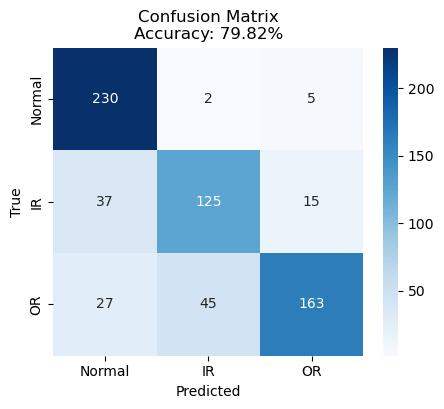

 - Model accuracy: 79.82%


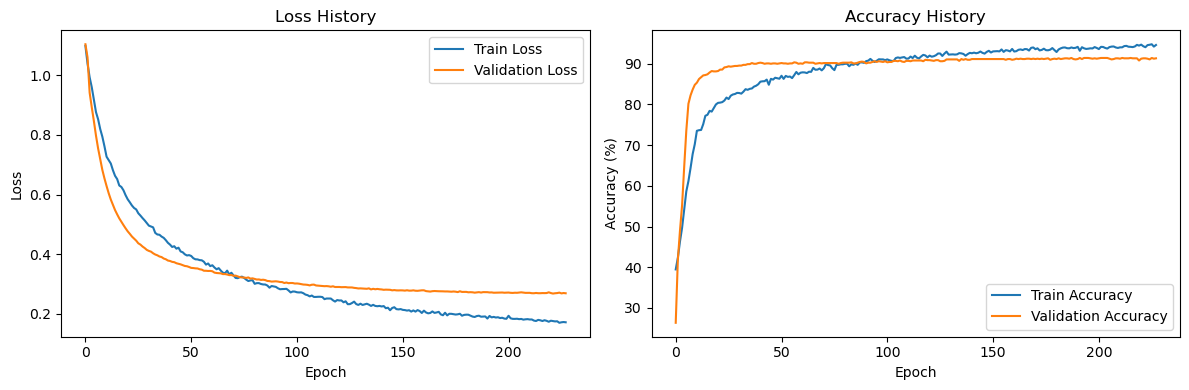

Early stopping at epoch 311


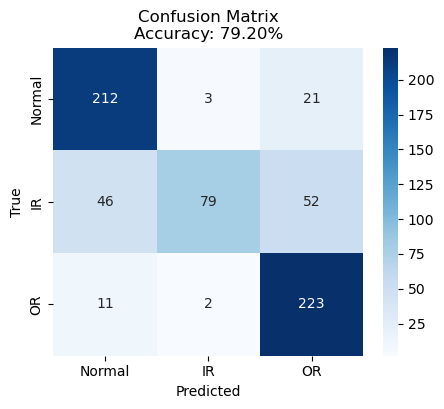

 - Model accuracy: 79.20%


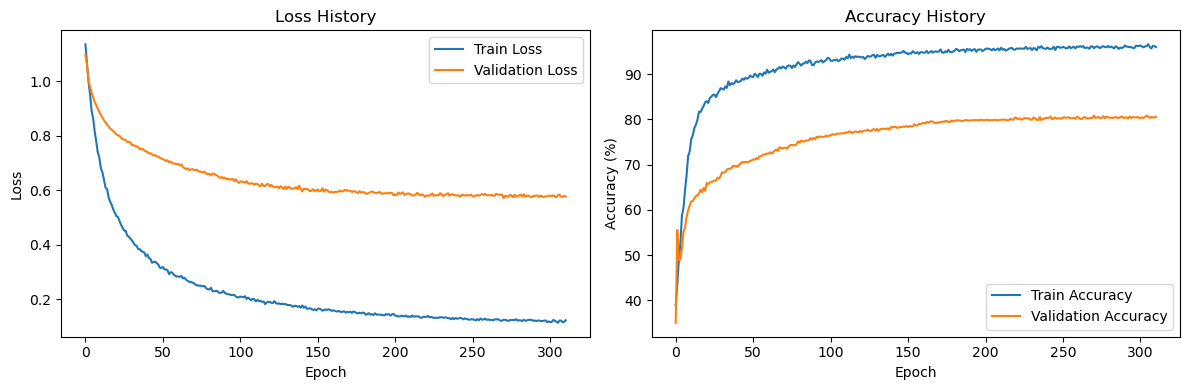

Early stopping at epoch 172


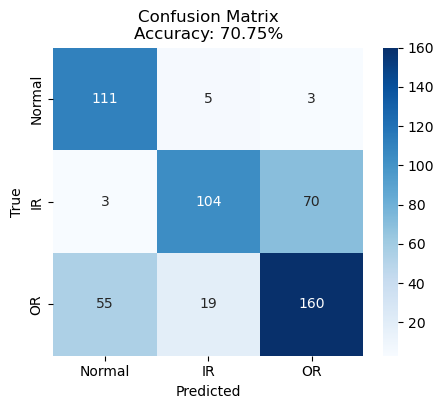

 - Model accuracy: 70.75%


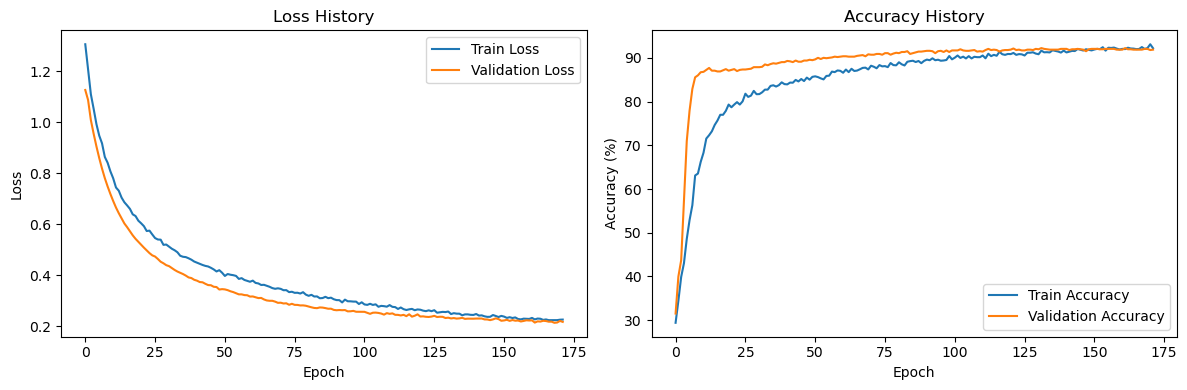

Early stopping at epoch 245


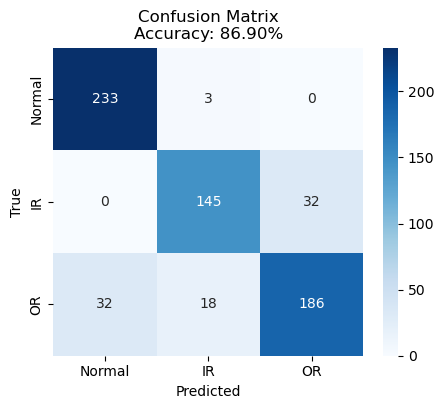

 - Model accuracy: 86.90%


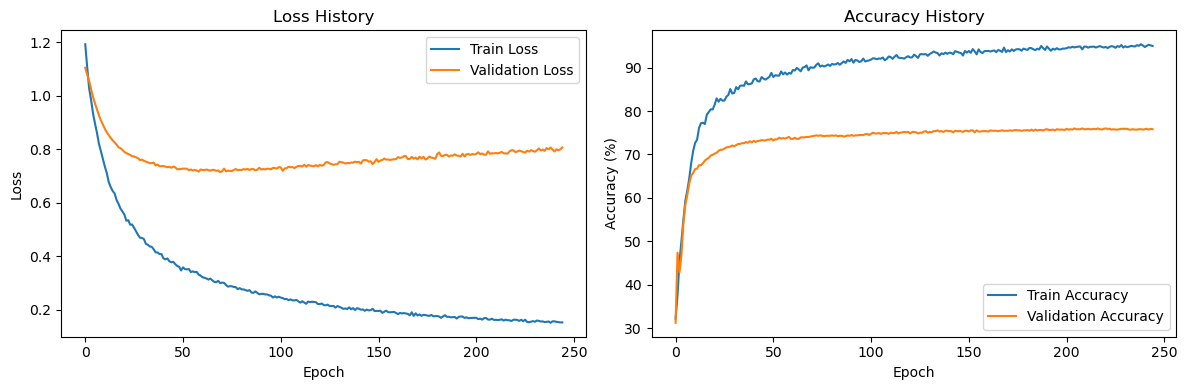

Early stopping at epoch 239


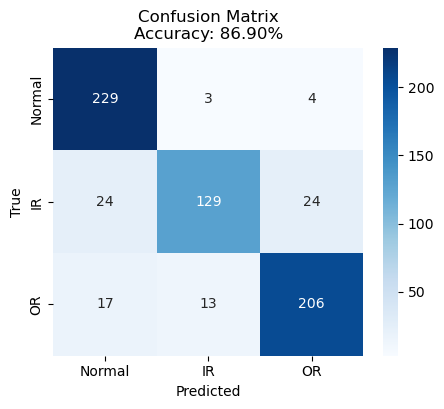

 - Model accuracy: 86.90%


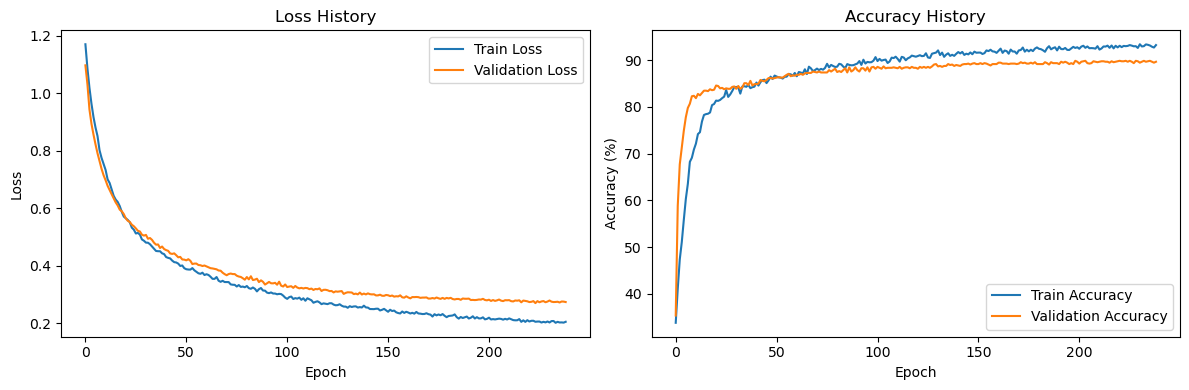

Early stopping at epoch 320


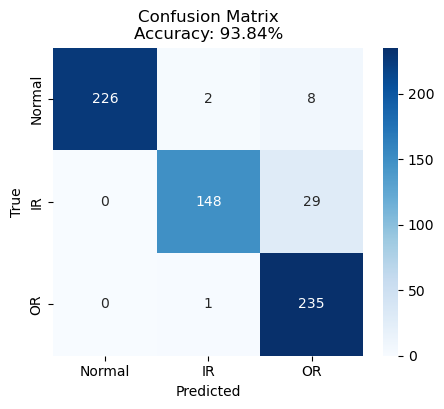

 - Model accuracy: 93.84%


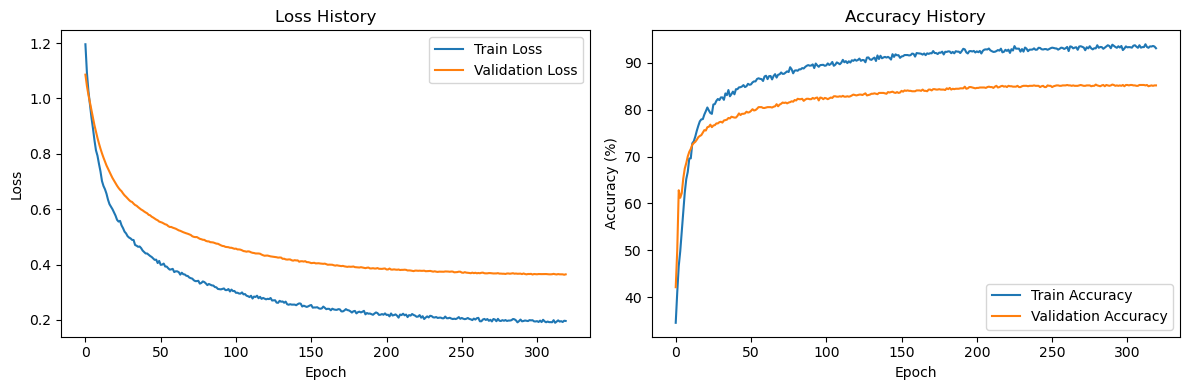

Early stopping at epoch 124


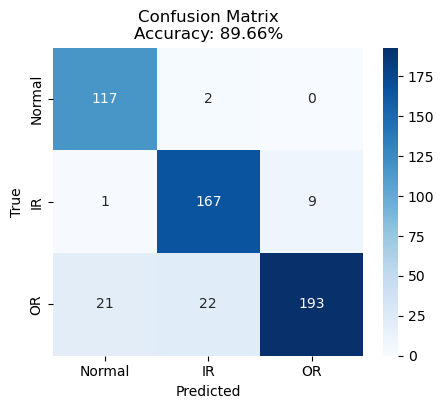

 - Model accuracy: 89.66%


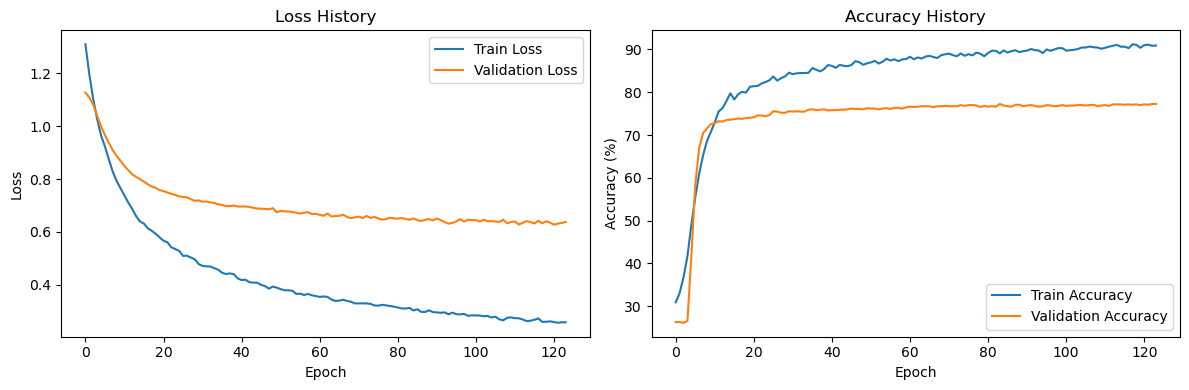

Early stopping at epoch 306


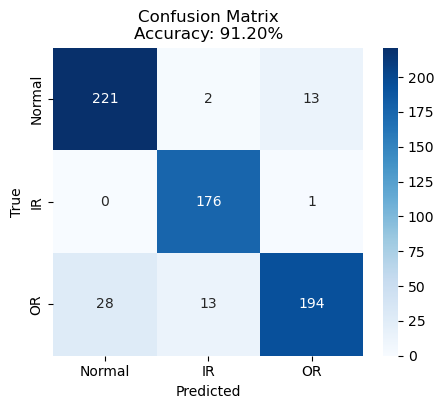

 - Model accuracy: 91.20%


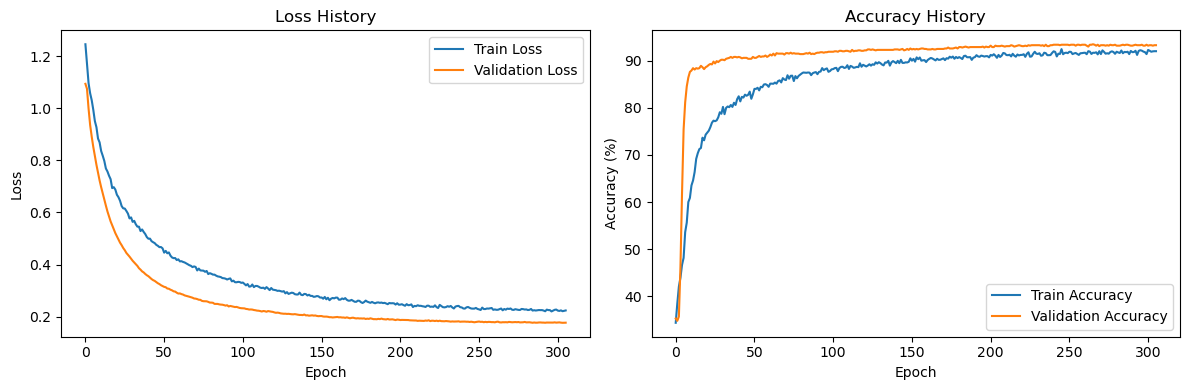

Early stopping at epoch 282


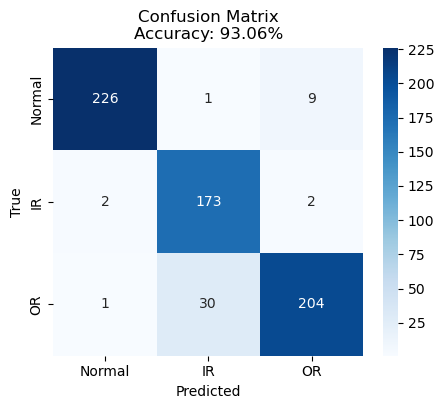

 - Model accuracy: 93.06%


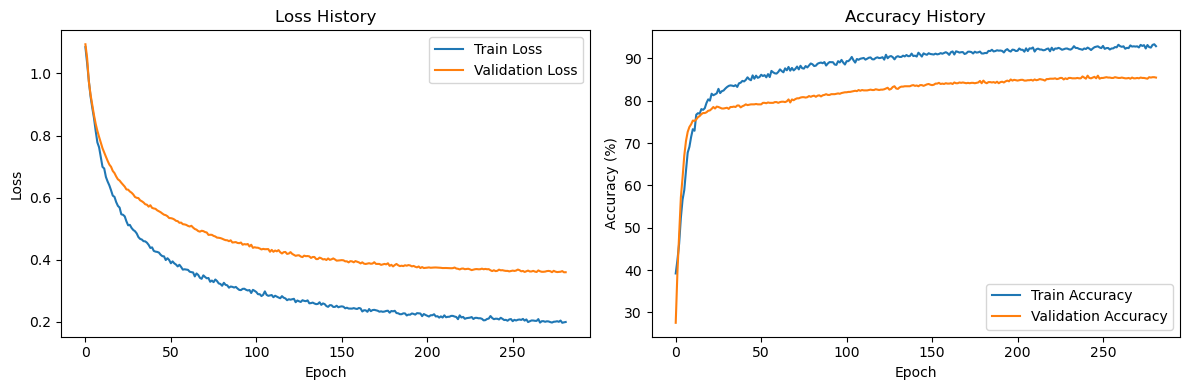

Early stopping at epoch 207


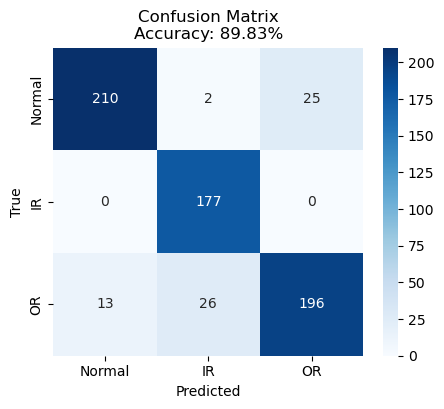

 - Model accuracy: 89.83%


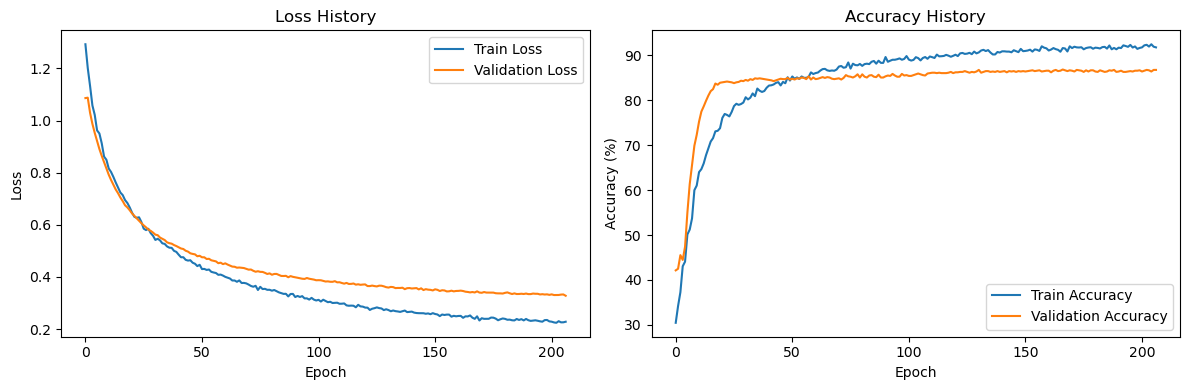

Early stopping at epoch 207


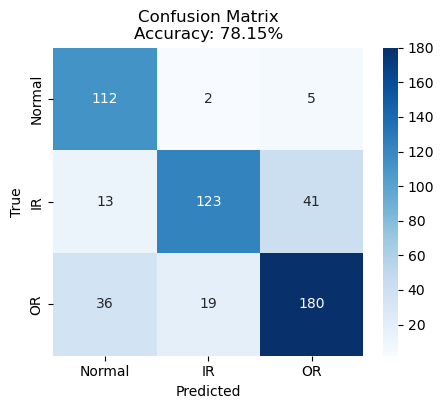

 - Model accuracy: 78.15%


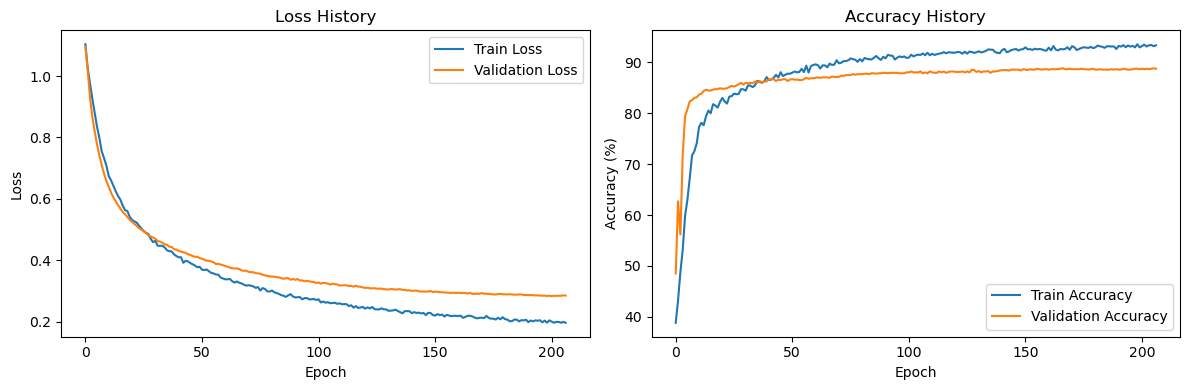

Early stopping at epoch 333


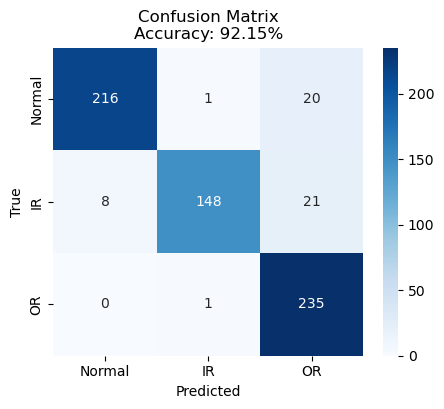

 - Model accuracy: 92.15%


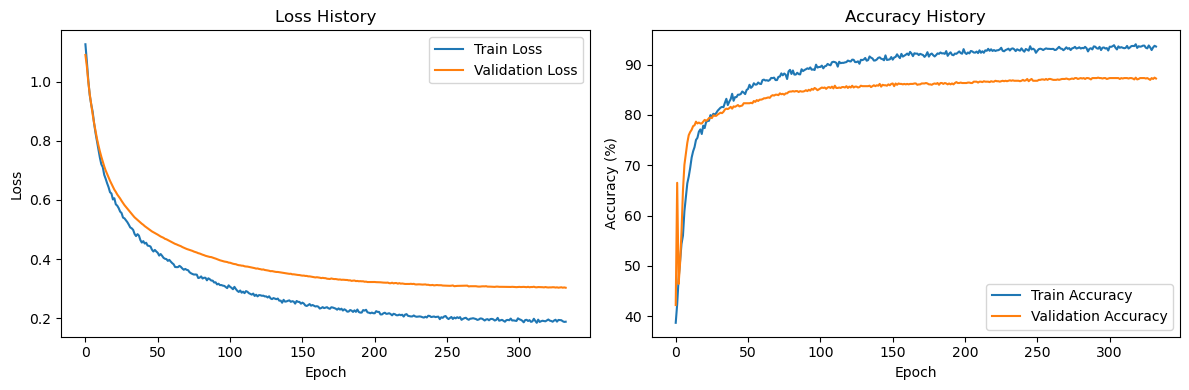

Early stopping at epoch 95


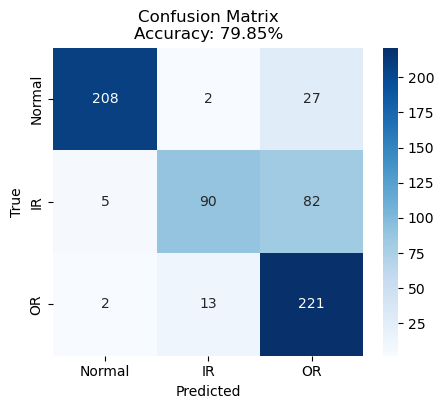

 - Model accuracy: 79.85%


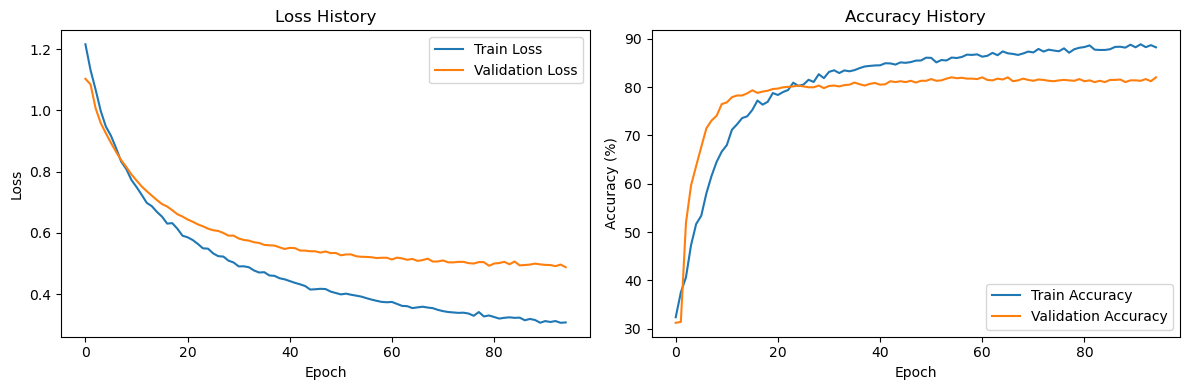

Early stopping at epoch 224


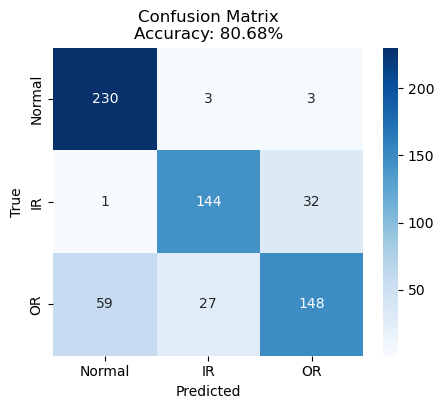

 - Model accuracy: 80.68%


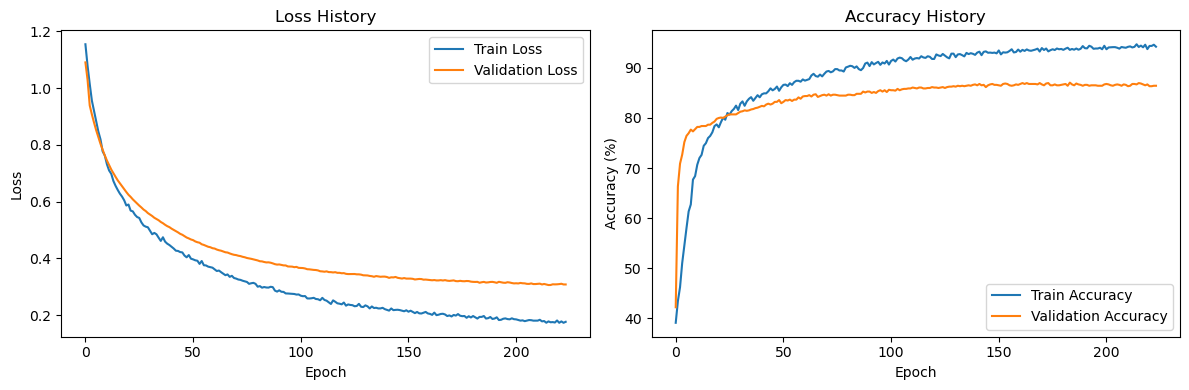

Early stopping at epoch 269


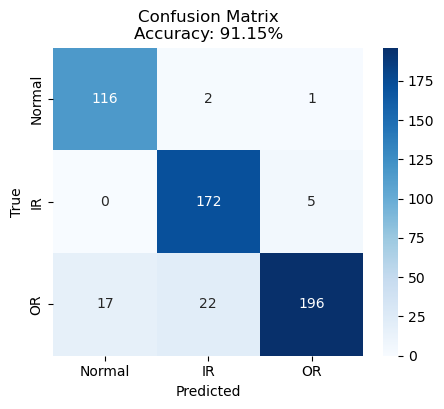

 - Model accuracy: 91.15%


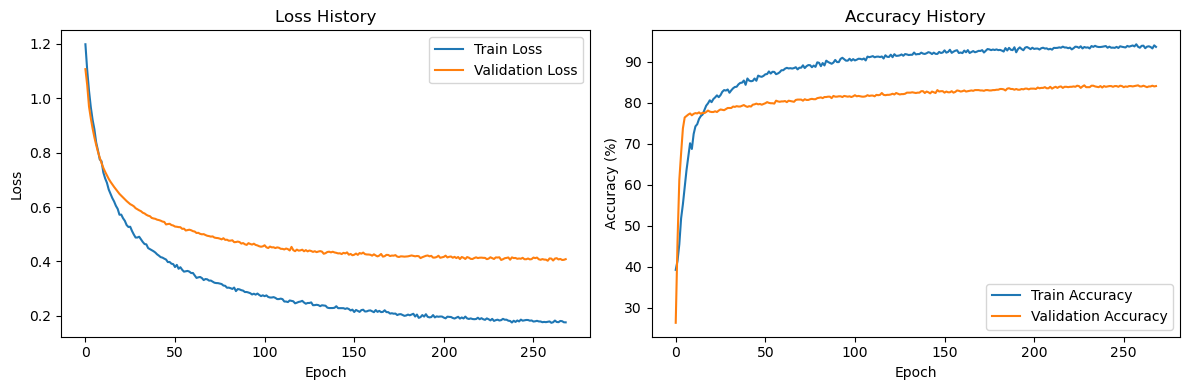

Early stopping at epoch 287


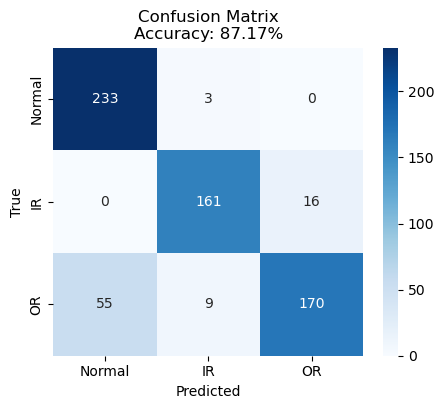

 - Model accuracy: 87.17%


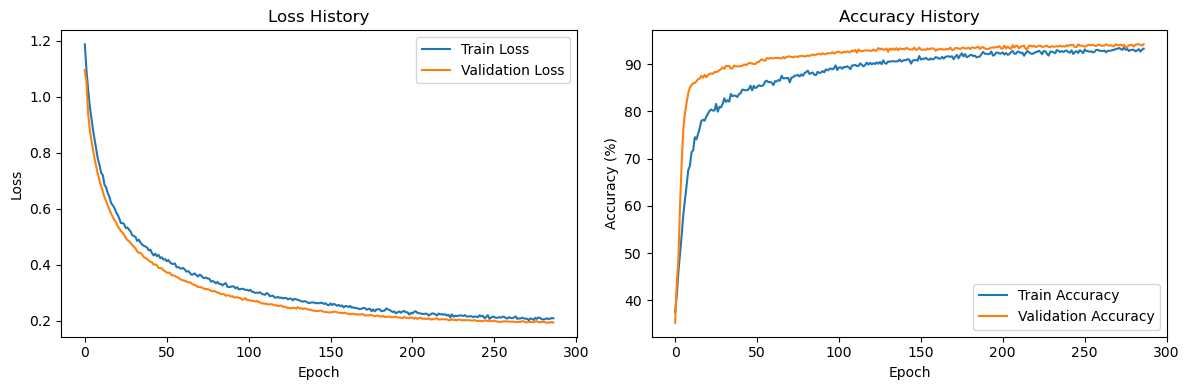

Early stopping at epoch 194


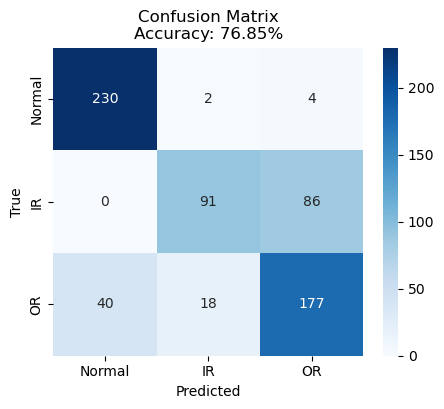

 - Model accuracy: 76.85%


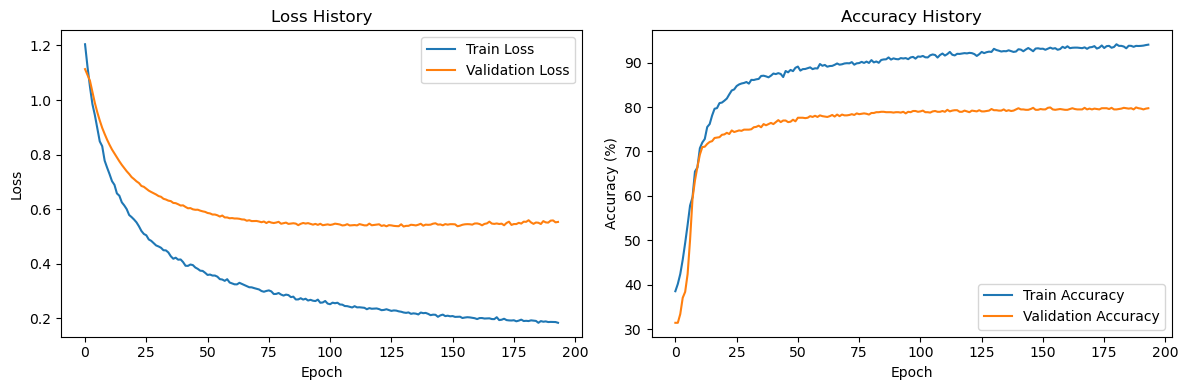

Early stopping at epoch 310


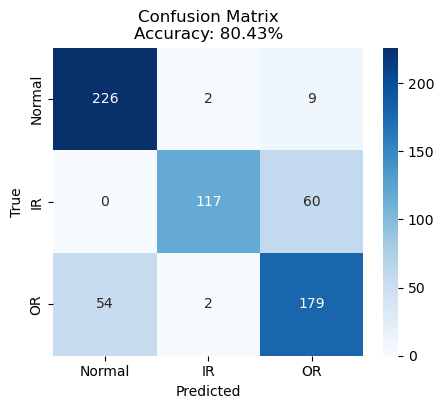

 - Model accuracy: 80.43%


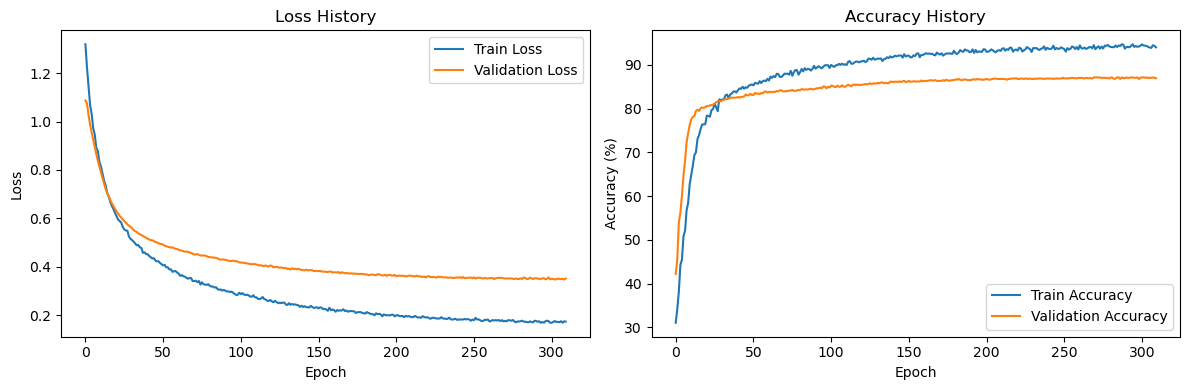

Early stopping at epoch 292


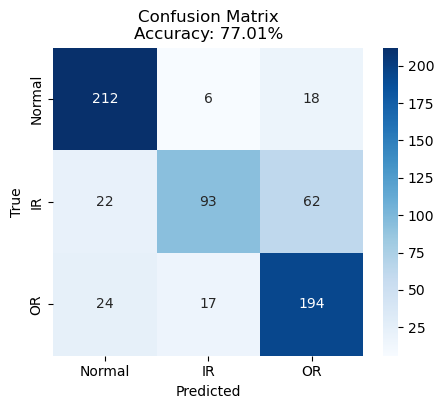

 - Model accuracy: 77.01%


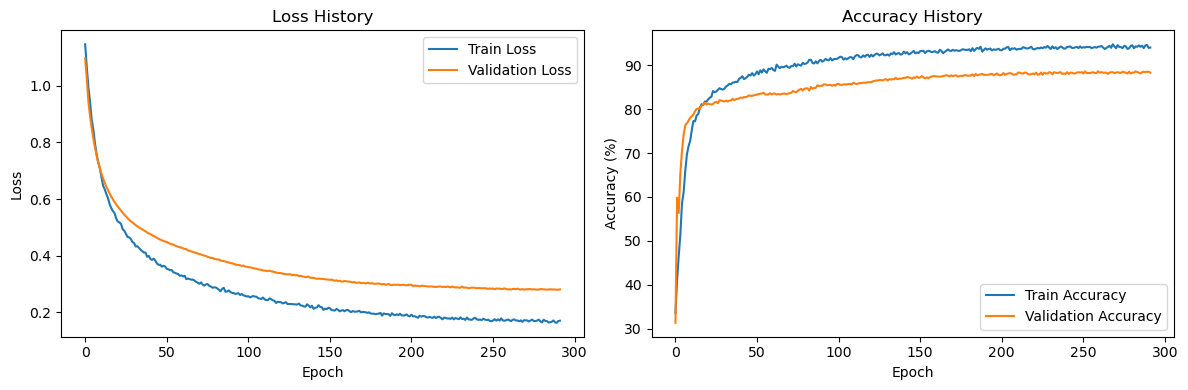

Early stopping at epoch 233


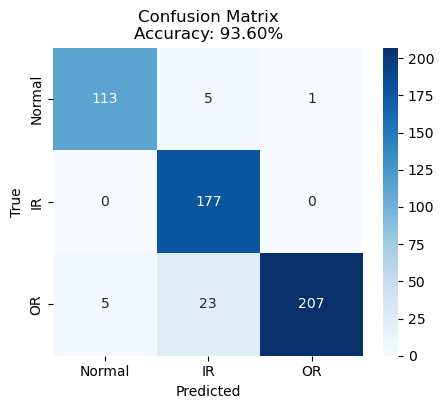

 - Model accuracy: 93.60%


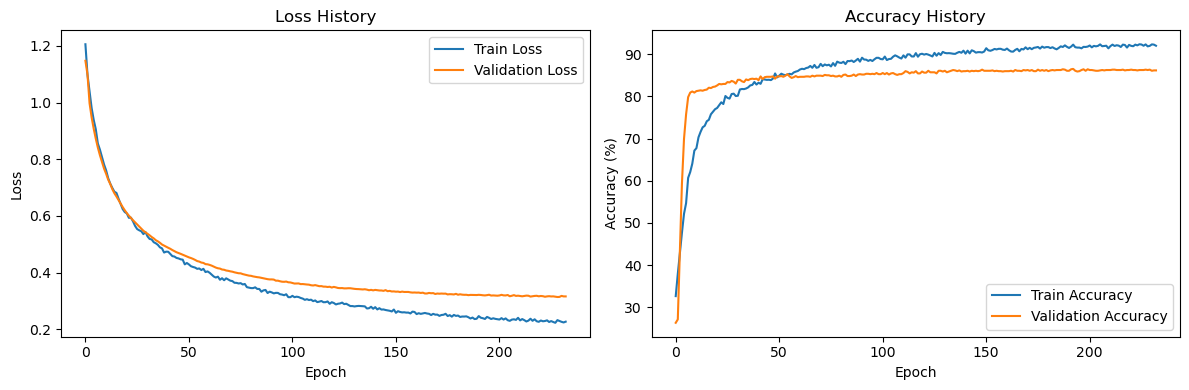

Early stopping at epoch 123


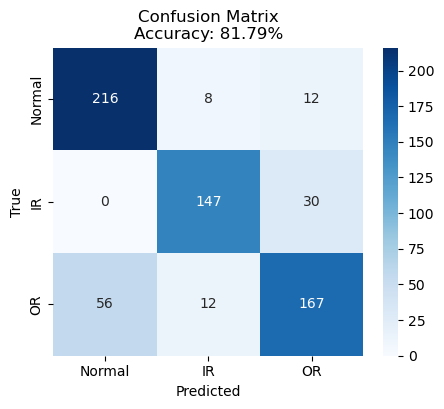

 - Model accuracy: 81.79%


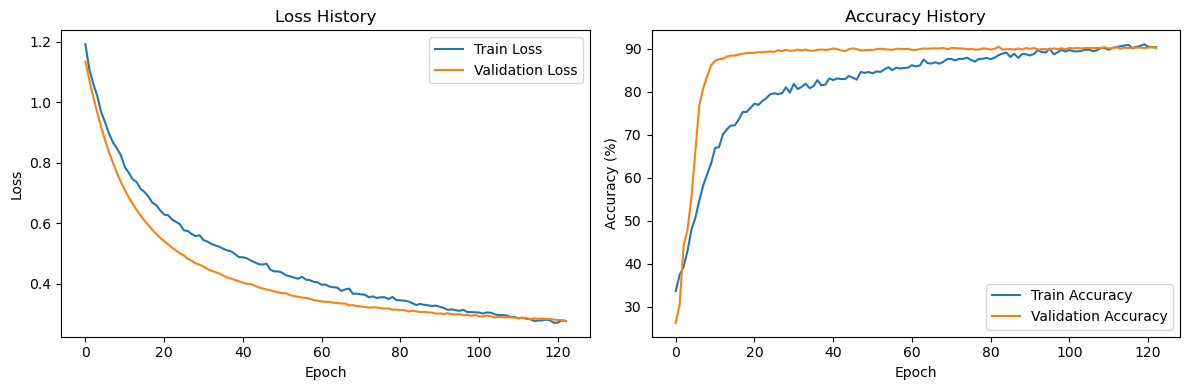

Early stopping at epoch 368


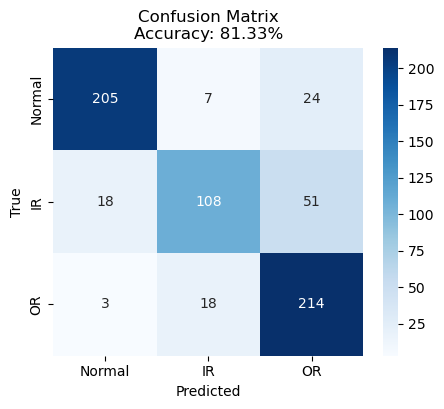

 - Model accuracy: 81.33%


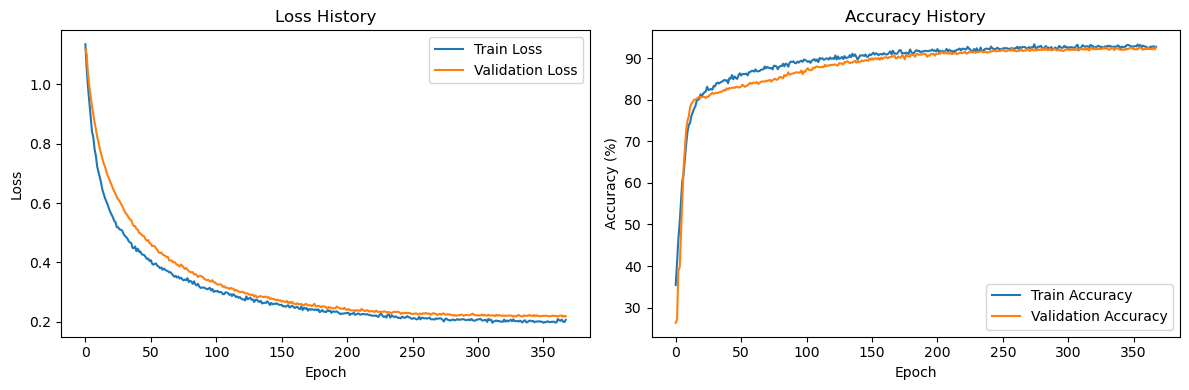

Early stopping at epoch 365


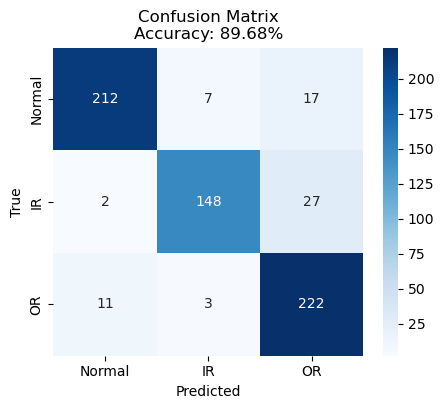

 - Model accuracy: 89.68%


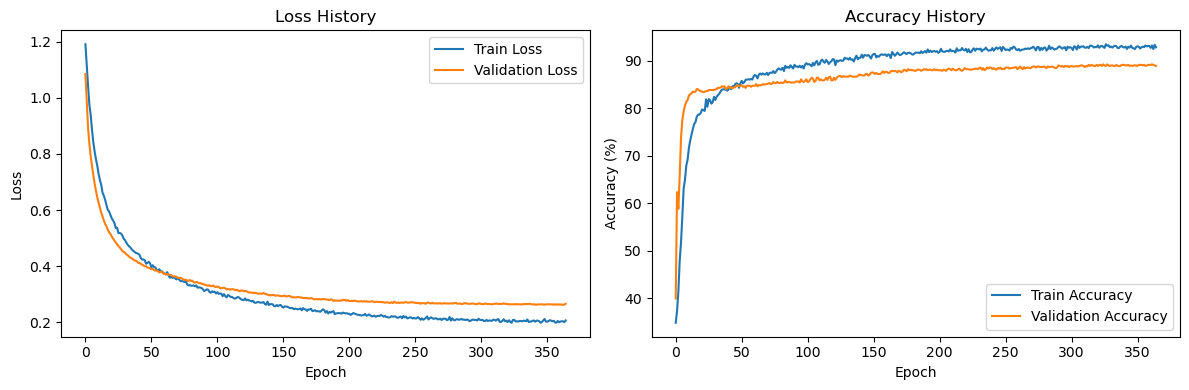

Early stopping at epoch 157


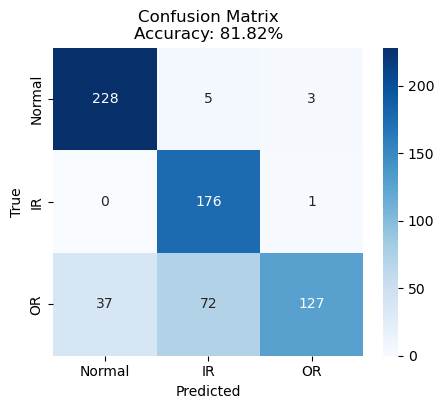

 - Model accuracy: 81.82%


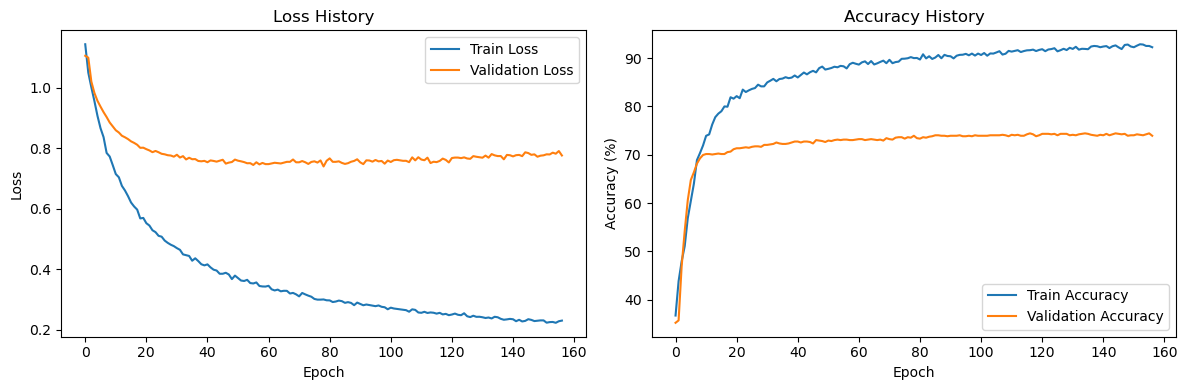

Early stopping at epoch 294


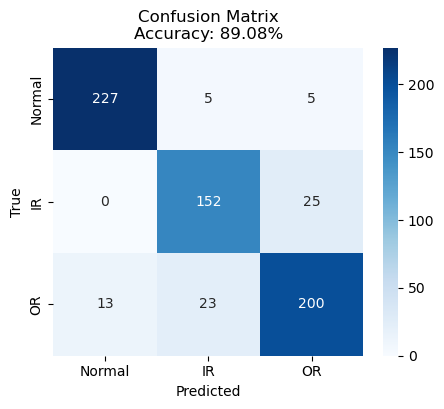

 - Model accuracy: 89.08%


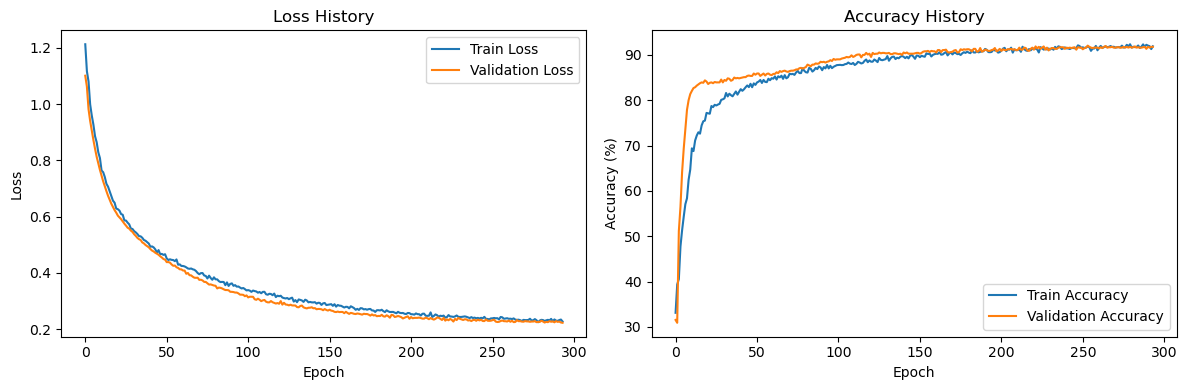

Early stopping at epoch 291


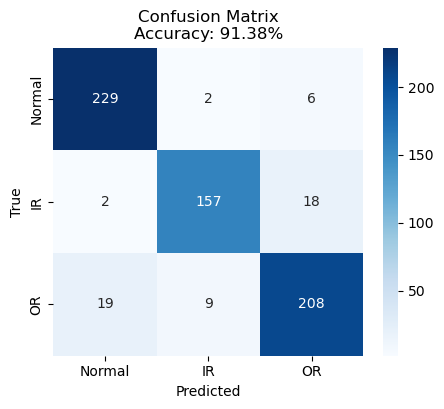

 - Model accuracy: 91.38%


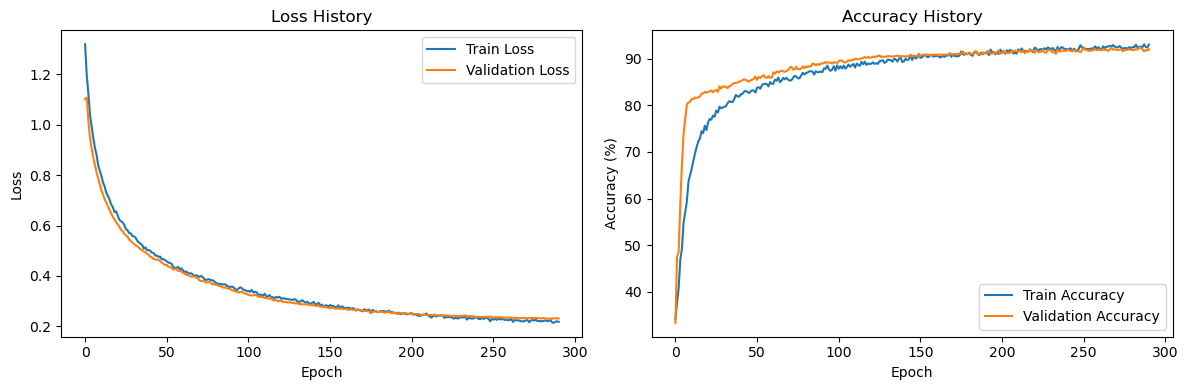

Early stopping at epoch 160


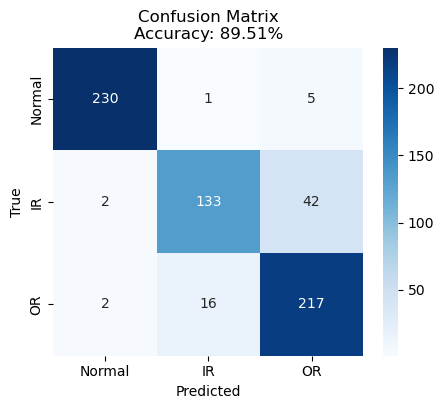

 - Model accuracy: 89.51%


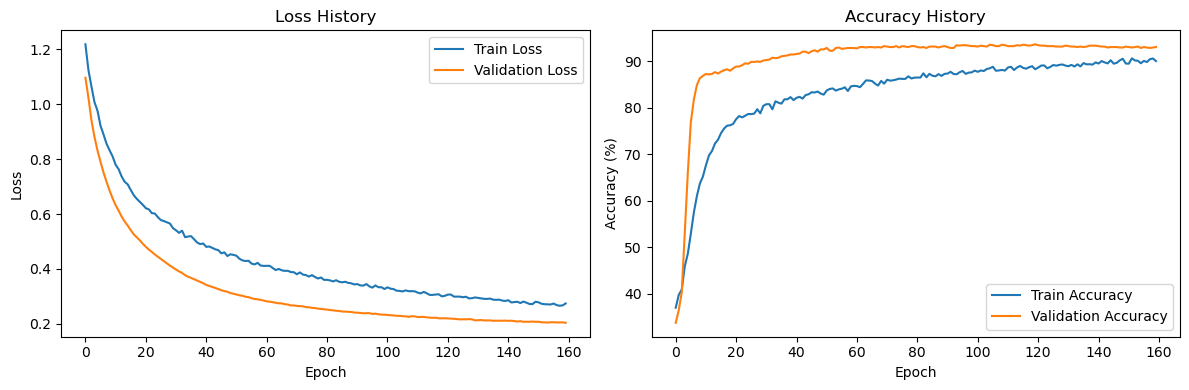

Early stopping at epoch 333


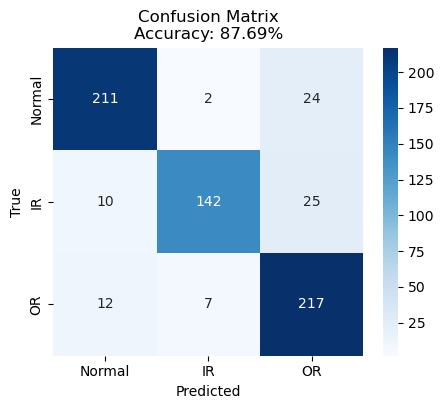

 - Model accuracy: 87.69%


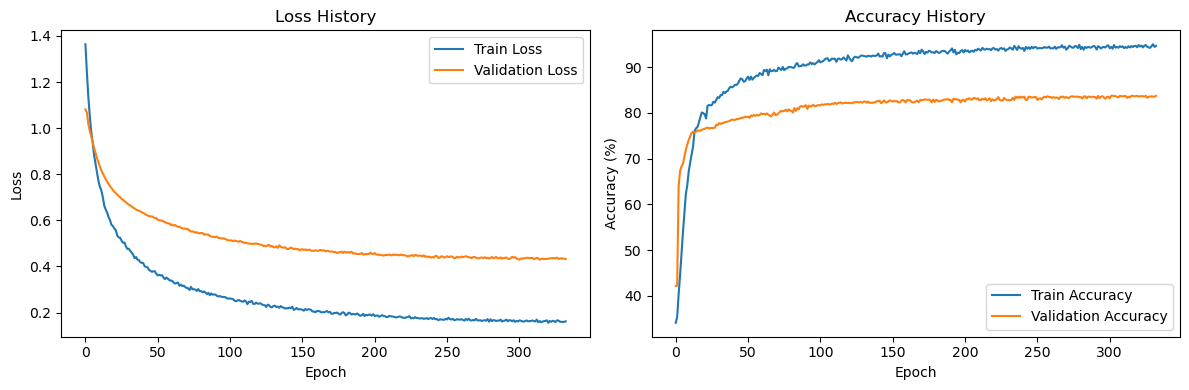

Early stopping at epoch 315


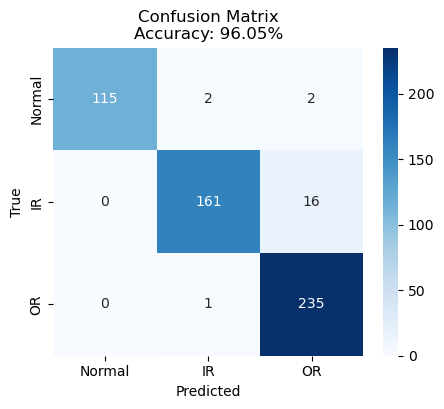

 - Model accuracy: 96.05%


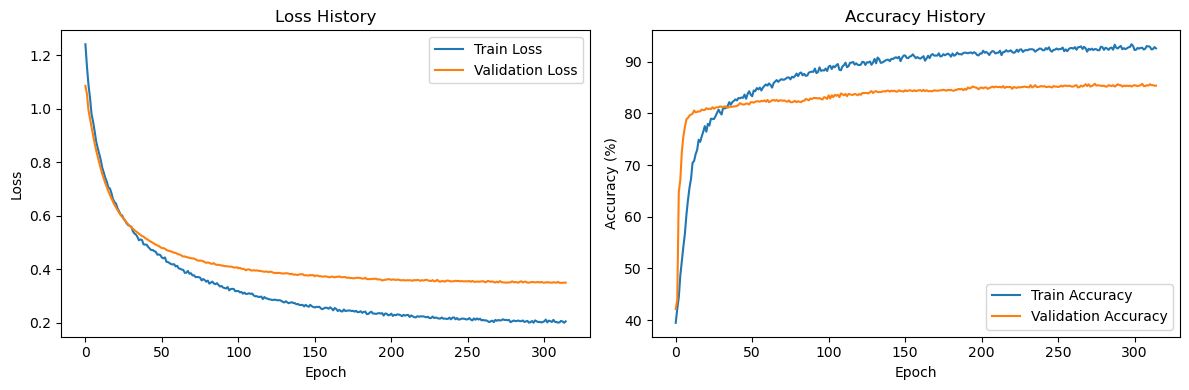

Early stopping at epoch 117


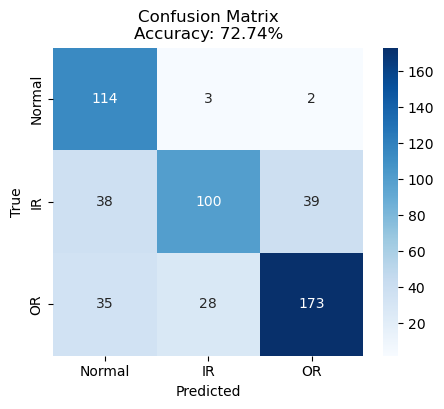

 - Model accuracy: 72.74%


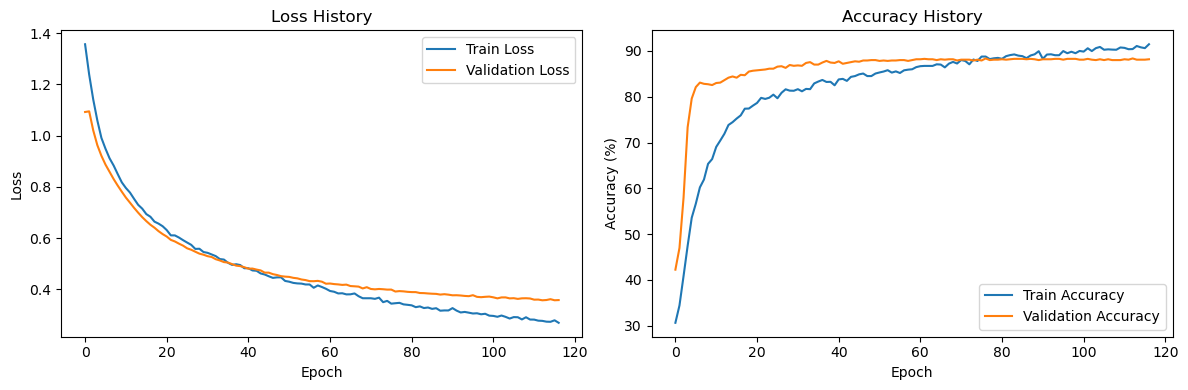

Mean accuracy: 0.8530909015600663
Std accuracy: 0.06629020583464912


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='l2_norm')
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))